# **Credit Risk Discrimination Analysis in a Variable**

- Analysis of whether the consumer unit creation time in the energy segment carrier poses a risk of default in PRIVATE COMPANY.
- Assessment regarding X and Y.

In [ ]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio

import plotly.subplots
import scipy
import warnings

from common.gustavo import main_subplot_layout, SIDDIQI

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings("ignore", category=RuntimeWarning, message="overflow encountered in exp")
pio.renderers.default = 'png'


## **Extraction**

In [ ]:
# Recuperando as bases dos arquivos específicos
df_1 = pd.read_pickle(r'path.pkl')
df_2 = pd.read_pickle(r'path.pkl')
df_3 = pd.read_pickle(r'path.pkl')
df_4 = pd.read_pickle(r'path.pkl')

## **Treatment**

#### Main Dataset

In [ ]:
# PRIVATE CODE

#### Analysis DataFrame

In [ ]:
# PRIVATE CODE

In [ ]:
def analysis_df(df=df, loc=None, cia=None, tipo='RECUP'):

    if tipo == 'OVER':
        df = df[df['DATE'] <= '2024-03-01']

    total = df.groupby(by=f'MES {cia}')[f'MES {cia}'].count().iloc[:loc]
    account = df.groupby(by=f'MES {cia}')[f'{tipo}'].sum().iloc[:loc]

    if tipo == 'RECUP':
        return round(100 - (100 * account / total),2), total, account
    elif tipo == 'OVER':
        return round(100 * account / total,2), total, account

#### Graph Functions

In [ ]:
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

def percent_recup(source=pd.Series) -> None:
    fig = go.Figure()
    fig.add_trace( 
        trace=go.Scatter(
            y=source,
            mode='lines+markers',
            marker=go.scatter.Marker(
                color='#bbbbbb', size=4
            ),
            name='Percentual',
            hovertemplate='Percentual: %{y}%<br>' + 'Month: %{x}<br>',
    ))
    fig.add_trace( 
        trace=go.Scatter(
            x=[0,150],
            y=[source.iloc[:].mean(), source.iloc[:].mean()],
            mode='lines',
            line=go.scatter.Line(
                color='#2cbfd6', dash='9px', 
            ),
            name='Mean',
            hovertemplate='Mean = %{y}<br>'
    ))
    try:
        popt, pcov = scipy.optimize.curve_fit(exp_decay, source.index[:151], source.values[:151]);
        fig.add_trace( 
            trace=go.Scatter(
                x=source.index,
                y=exp_decay(source.index, *popt),
                mode='lines',
                line=go.scatter.Line(
                    color='#333333', dash='solid'
                ),
                name='Exp Decay',
                hovertemplate='x = %{x}<br>'+'f(x) = %{y:.2f}<br>',
        ))
    except:
        ...
    return fig

# ================================================================================================================

def total_graph(total=pd.Series, nao_pago=pd.Series) -> None:
    fig = go.Figure()
    fig.add_trace( 
        trace=go.Bar(
            y=total,
            marker=go.bar.Marker(
                color='#333333'
            ),
            hovertemplate='Clients: %{y}<br>' + 'Month: %{x}<br>' + 'Percentual: %{customdata:.2f}%<br>'
                                               + f'Total: {total.sum()}',
            customdata=100*total/total.sum(),
            name='Total'
    ))
    fig.add_trace( 
        trace=go.Bar(
            # Private Code
    ))
    return fig

# **Credit and Default Analysis by Ownership**

- **New Ownership**:
    - The number of **people lending credit** is significantly **higher in cases of new ownership**.

- **Default Comparison by Company**:
    - **X** has a **default that tends** to approximately $x \to 12.7%$ in longer months, which is higher compared to **Y** (with $x \to 9.6%%$).

- **Default Rate Over Time**:
    - The default rate **decreases significantly** in the first **20 months after securitization**, in both metrics analyzed:
    - **Rec120d**: Represents the default in 120 days after the new ownership. 
    - **Over90M7**: Represents default of more than 90 days, monitored from month 7 after securitization.

- **Comparison between Over90M7 and Rec120d**:
    - The **Over90M7** metric is considerably **more expressive** than **Rec120d**, with a default constant of around **20%**.
<br><br>

---

<br>

> ### **Conclusion**
> The default analysis suggests that the first phase of securitization is crucial to minimize credit risks.<br>
> Visually, it can be concluded that it is a discriminant variable of credit risk.

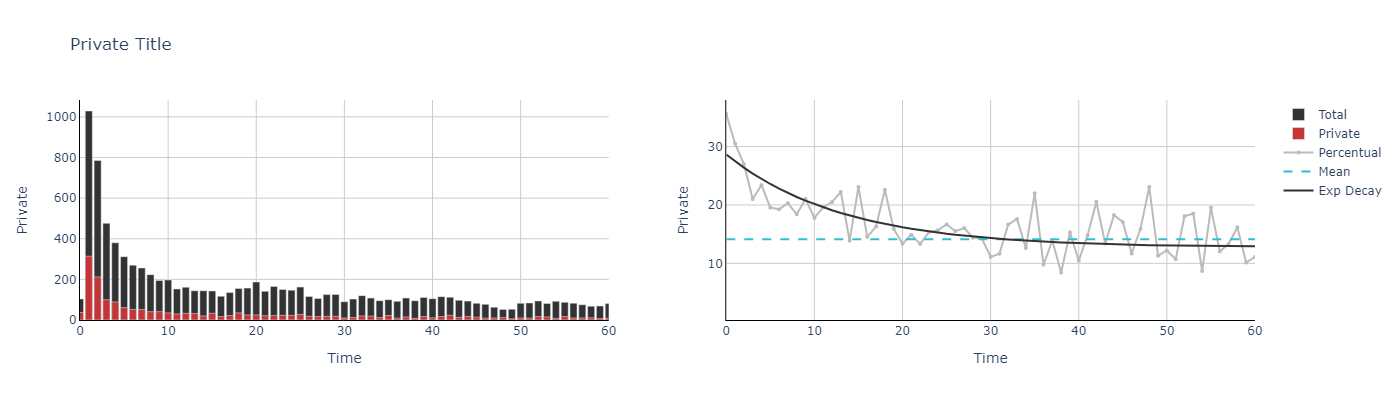

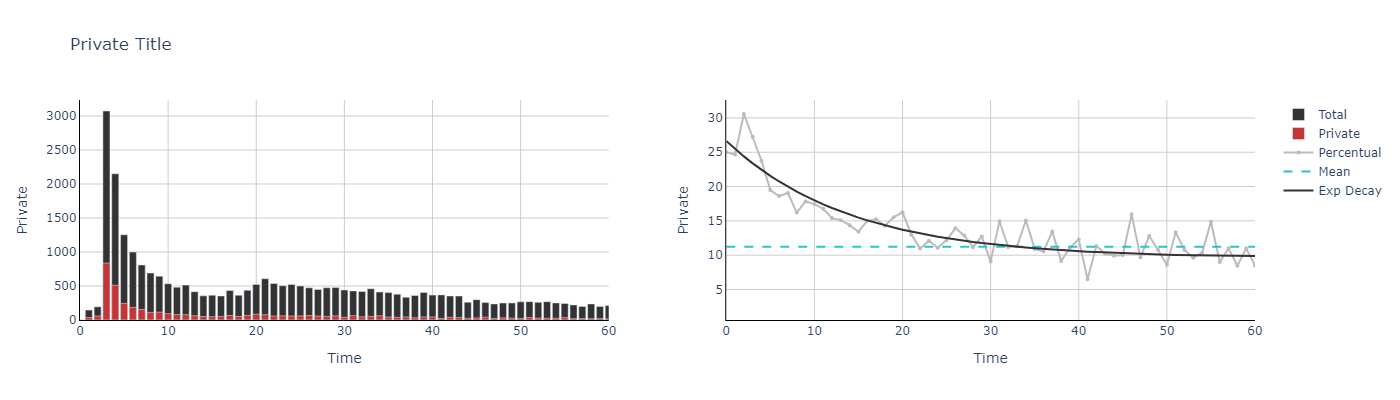

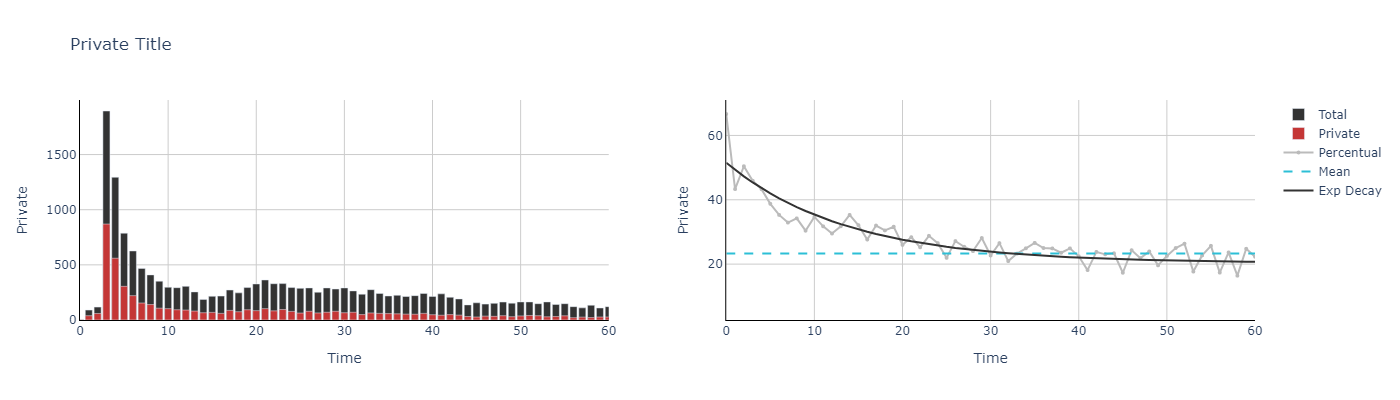

In [ ]:
# PRIVATE CODE

# **Analysis by Type of Customer**

> ### **Conclusion**
> **New customers** showed high default behavior at the beginning of their ownership.<br>
> **Repurchase customers** are less urgent.

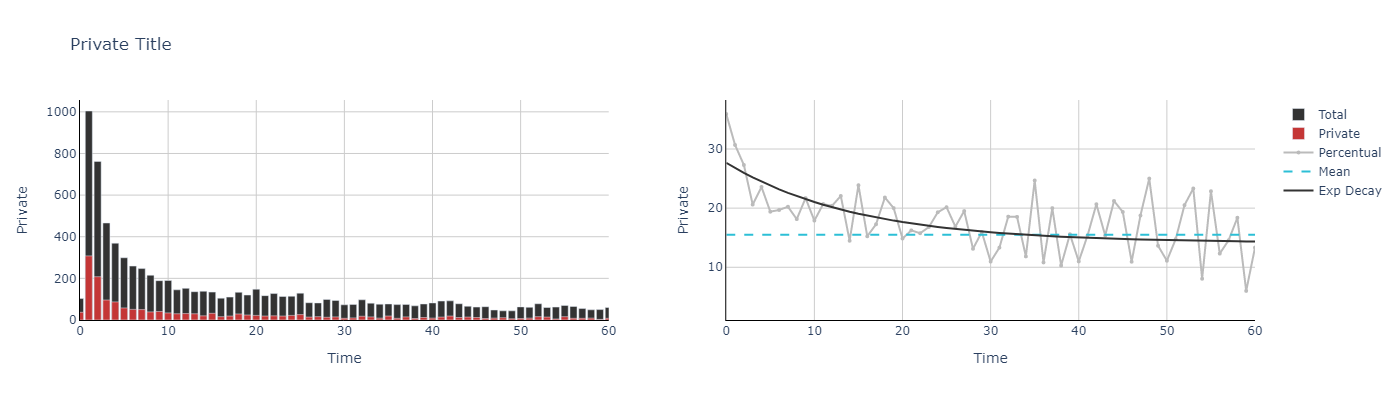

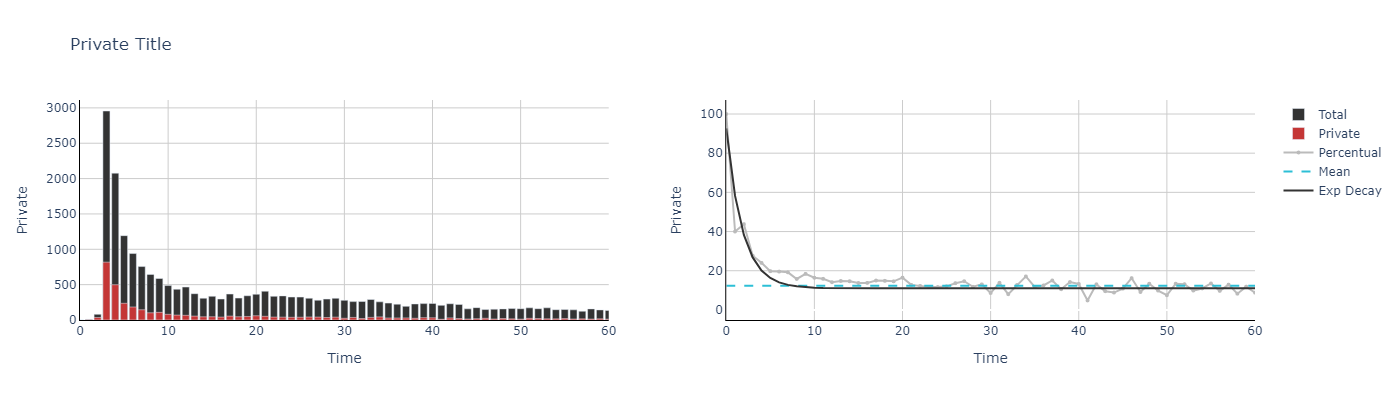

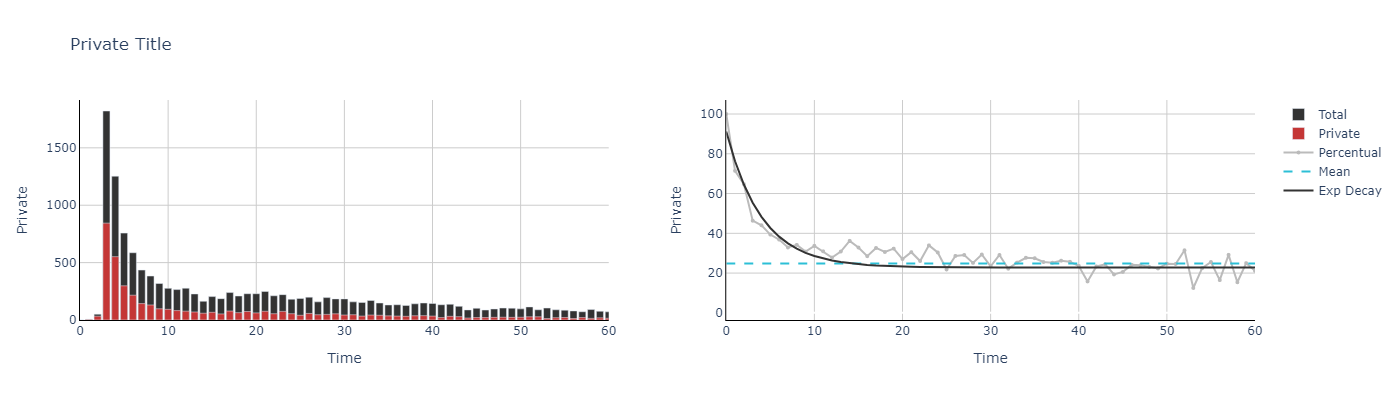

In [ ]:
# PRIVATE CODE

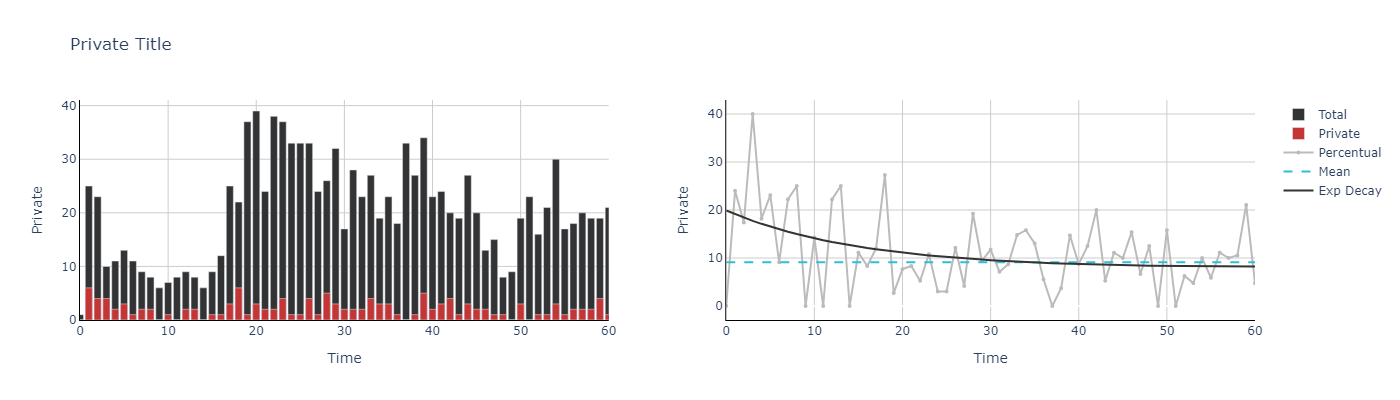

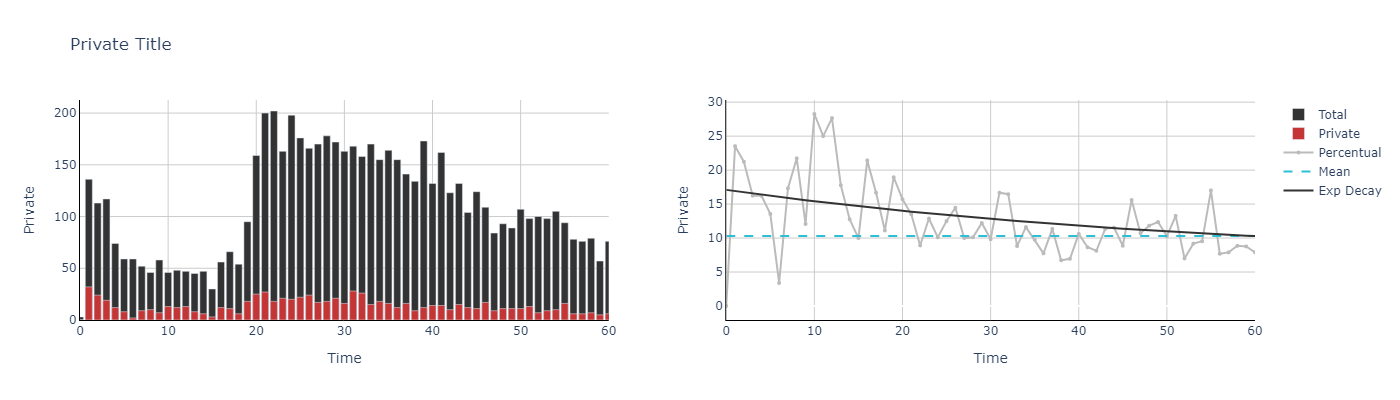

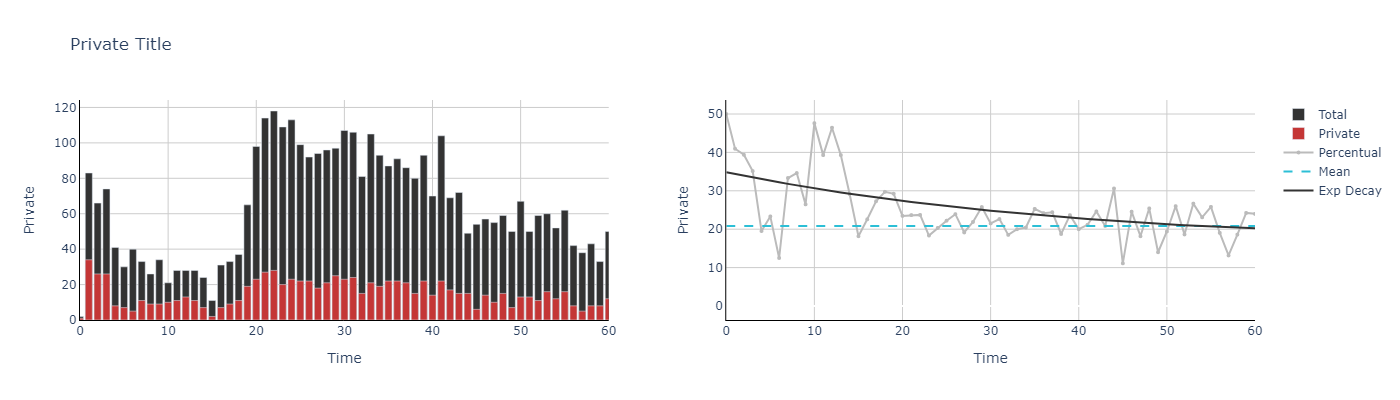

In [ ]:
# PRIVATE CODE

# **Rating Assessment**

> ### **Conclusion**
> As the rating decreases, the **average default** on the first installment increases.<br>
> As the rating decreases, the concentration of the number of customers becomes more **asymmetric to the right** (positive), indicating that worse customers need more credit at the beginning of a tenure.

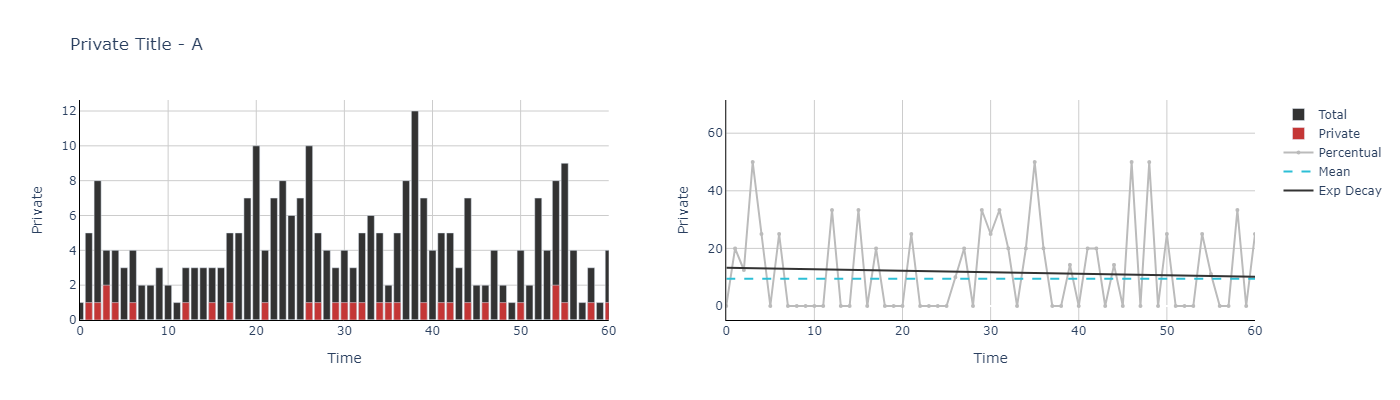

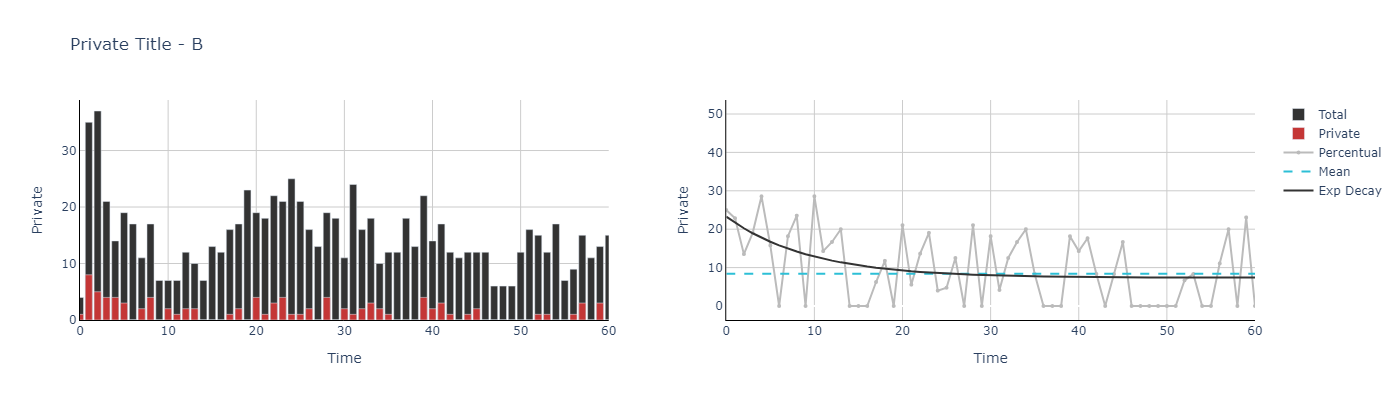

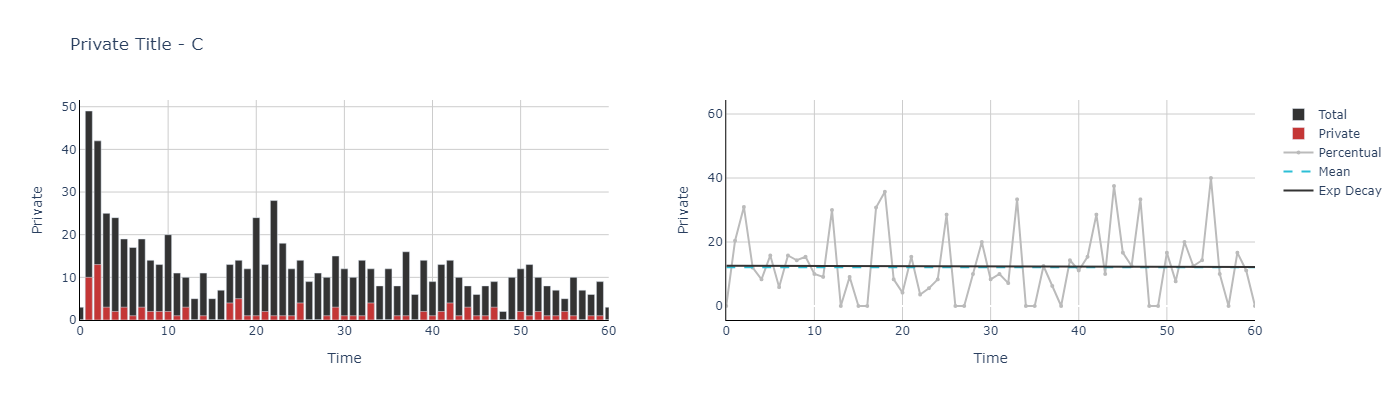

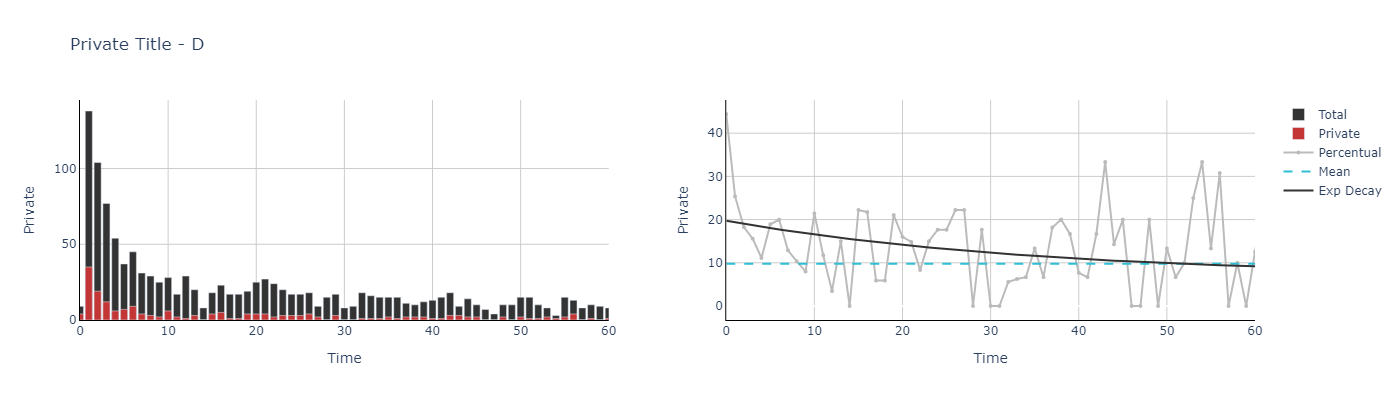

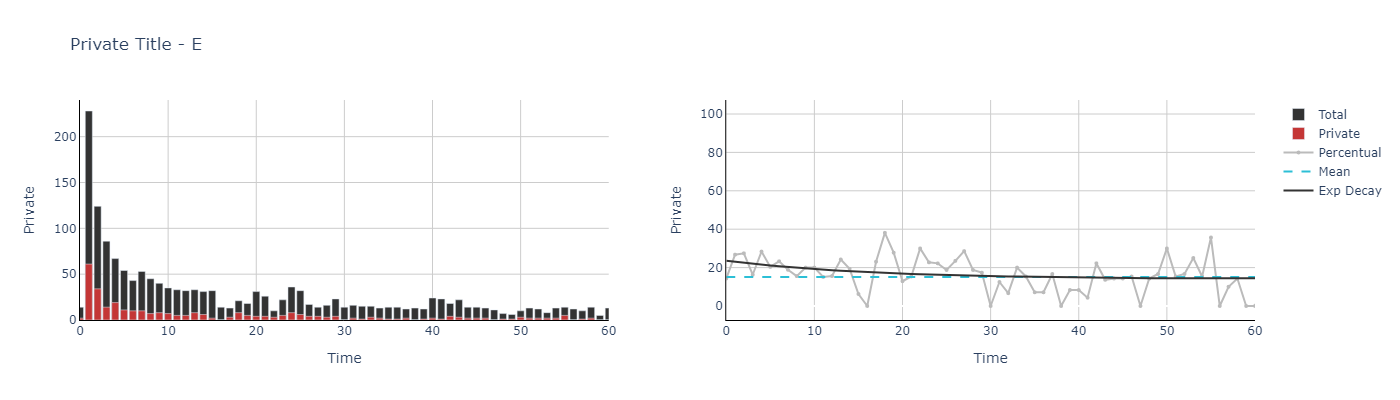

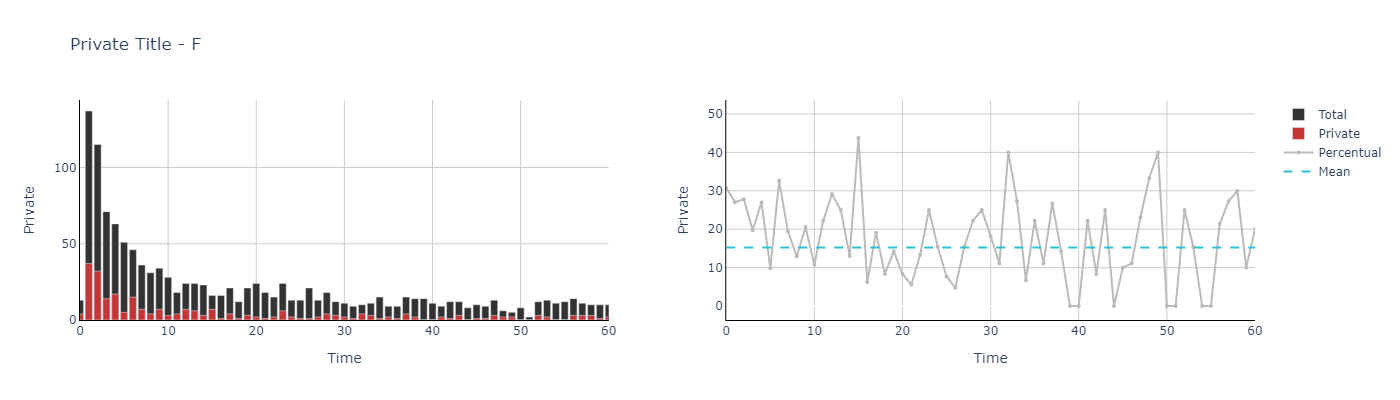

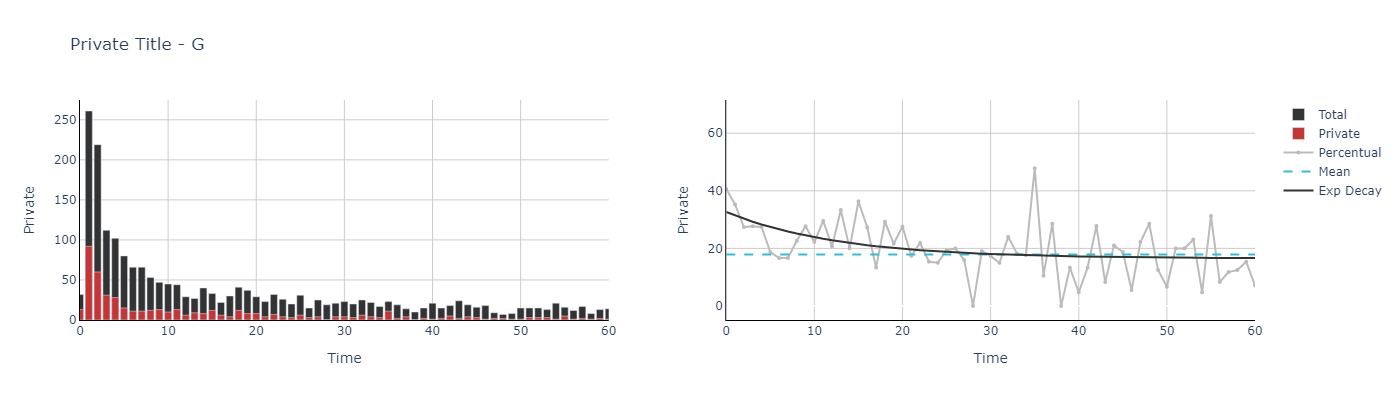

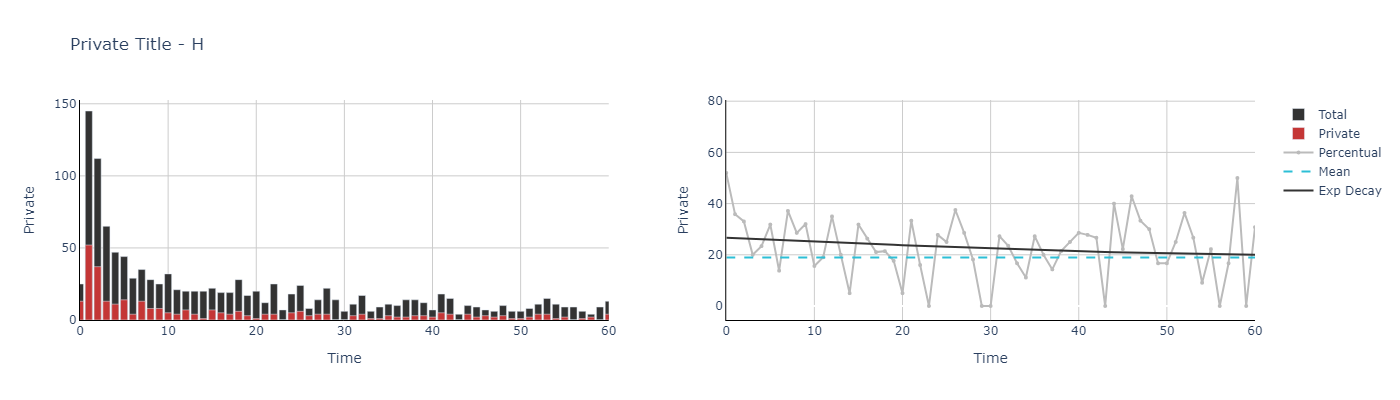

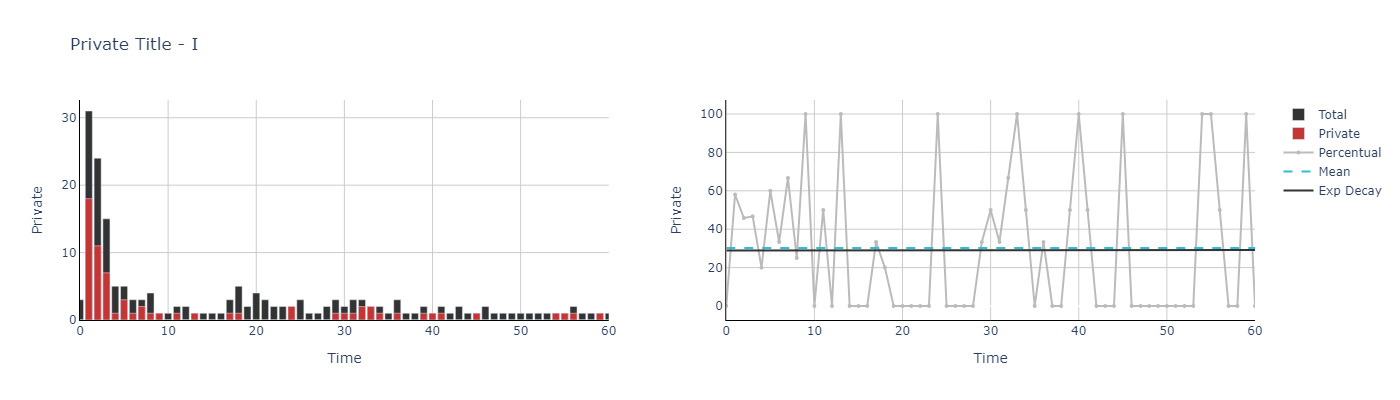

In [ ]:
# PRIVATE CODE

# **Discrimination Analysis**

- The discrimination analysis performed with the **IV** (Information Value) shows that the discriminating power of the variable is **moderate**.
- When **merging the data set into 2 classes**, **weak discrimination** is observed;
- The discriminating information contained in the first 8 months of ownership is the same as in the remaining months!
<br><br>

---

<br>

> ### **Conclusion**
> It can be concluded that, although it is a discriminating variable of credit risk, it is considered moderate/low by a univariate assessment.

### DataFrames

In [ ]:
# PRIVATE CODE

### **Results**

SIDDIQI


,Siddiqi
"IV < 0,1",Fraco
"0,1 ≤ IV ≤ 0,3",Moderado
"IV > 0,3",Forte
"IV > 0,5",Super Forte


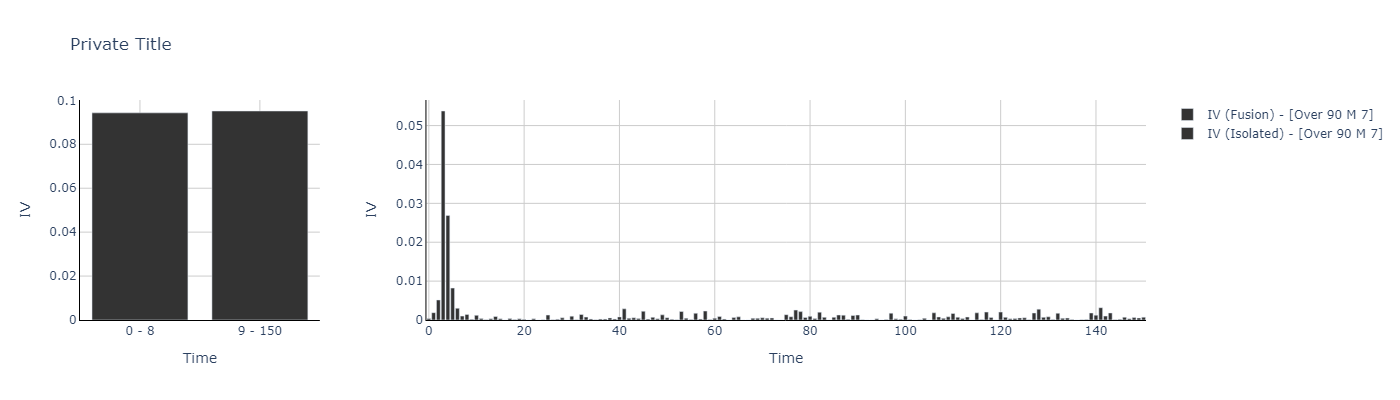

In [ ]:
print('SIDDIQI')
display(SIDDIQI); print()

# PRIVATE CODE